# Test AGDC API Functions

Fei Zhang

2016 October

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import pandas

import sys

sys.path.insert(0, '/g/data/u46/fxz547/Githubz/agdc-v2') 
#sys.path.insert(0, '/home/547/fxz547/myGithub/agdc-v2')  #prepend a path

In [2]:
# import AGDC Python API modules

import datacube
from datacube.storage import masking

# Create an API data access object
dc = datacube.Datacube(app='GetData')

dc

Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://fxz547@130.56.244.227:6432/datacube)>>>

In [3]:
dc.list_products()

name  \
id                                 
36            bom_rainfall_grids   
32                      dsm1sv10   
42                 ls5_fc_albers   
2               ls5_level1_scene   
6                ls5_nbar_albers   
3                 ls5_nbar_scene   
26              ls5_nbart_albers   
4                ls5_nbart_scene   
41               ls5_ndvi_albers   
23                 ls5_pq_albers   
5                   ls5_pq_scene   
1   ls5_satellite_telemetry_data   
9               ls7_level1_scene   
21               ls7_nbar_albers   
10                ls7_nbar_scene   
29              ls7_nbart_albers   
11               ls7_nbart_scene   
22                 ls7_pq_albers   
12                  ls7_pq_scene   
8   ls7_satellite_telemetry_data   
40          ls8_level1_oli_scene   
14              ls8_level1_scene   
19               ls8_nbar_albers   
15                ls8_nbar_scene   
28              ls8_nbart_albers   
16               ls8_nbart_scene   
20                 ls8_pq_albers   
17                  ls8_pq_scene   
13  ls8_satellite_telemetry_data   
43                   wofs_albers   

                                          description  \
id                                                      
36  Interpolated Rain Gauge Precipitation 1-Day Au...   
32                               DSM 1sec Version 1.0   
42  Landsat 5 Fractional Cover 25 metre, 100km til...   
2       Landsat 5 Level 1 At-sensor Radiance 25 metre   
6   Landsat 5 Surface Reflectance NBAR 25 metre, 1...   
3                             Landsat 5 NBAR 25 metre   
26  Landsat 5 Surface Reflectance NBART 25 metre, ...   
4                            Landsat 5 NBART 25 metre   
41  Landsat 5 Normalised Difference Vegetation Ind...   
23  Landsat 5 Pixel Quality 25 metre, 100km tile, ...   
5                               Landsat 5 PQ 25 metre   
1                  Landsat 5 Satellite Telemetry Data   
9       Landsat 7 Level 1 At-sensor Radiance 25 metre   
21  Landsat 7 Surface Reflectance NBAR 25 metre, 1...   
10                            Landsat 7 NBAR 25 metre   
29  Landsat 7 Surface Reflectance NBART 25 metre, ...   
11                           Landsat 7 NBART 25 metre   
22  Landsat 7 Pixel Quality 25 metre, 100km tile, ...   
12                              Landsat 7 PQ 25 metre   
8                  Landsat 7 Satellite Telemetry Data   
40  Landsat 8 Level 1 OLI At-sensor Radiance 25 metre   
14  Landsat 8 Level 1 OLI-TIRS At-sensor Radiance ...   
19  Landsat 8 Surface Reflectance NBAR 25 metre, 1...   
15                            Landsat 8 NBAR 25 metre   
28  Landsat 8 Surface Relfectance NBART 25 metre, ...   
16                           Landsat 8 NBART 25 metre   
20  Landsat 8 Pixel Quality 25 metre, 100km tile, ...   
17                              Landsat 8 PQ 25 metre   
13                 Landsat 8 Satellite Telemetry Data   
43  Historic Flood Mapping Water Observations from...   

                product_type  sat_path   format  lon   platform  sat_row  \
id                                                                         
36                  rainfall       NaN   NETCDF  NaN        BoM      NaN   
32                       DEM       NaN     ENVI  NaN       SRTM      NaN   
42          fractional_cover       NaN   NetCDF  NaN  LANDSAT_5      NaN   
2                     level1       NaN  GeoTiff  NaN  LANDSAT_5      NaN   
6                       nbar       NaN   NetCDF  NaN  LANDSAT_5      NaN   
3                       nbar       NaN  GeoTiff  NaN  LANDSAT_5      NaN   
26                     nbart       NaN   NetCDF  NaN  LANDSAT_5      NaN   
4                      nbart       NaN  GeoTiff  NaN  LANDSAT_5      NaN   
41                      ndvi       NaN   NetCDF  NaN  LANDSAT_5      NaN   
23                       pqa       NaN   NetCDF  NaN  LANDSAT_5      NaN   
5                        pqa       NaN  GeoTiff  NaN  LANDSAT_5      NaN   
1   satellite_telemetry_data       NaN      NaN  NaN  LANDSAT_

In [4]:
from datacube.api.query import query_group_by, query_geopolygon
from datacube.model import GeoBox
from datacube.helpers import ga_pq_fuser
from datacube.storage.masking import make_mask
# from tqdm import trange
# import tqdm

def load_masked_data(dc, name, **kwargs):
    data = dc.load(product='%s_nbar_albers' % name, group_by='solar_day', **kwargs)
    pq = dc.load(product='%s_pq_albers' % name, like=data, fuse_func=ga_pq_fuser, group_by='solar_day')
    mask = make_mask(pq.pixelquality, ga_good_pixel=True)
    data = data.where(mask)
    data.attrs['crs'] = pq.attrs['crs']
    return data

In [9]:
qdict= {
            'time': ('2015-01-01', '2016-01-01'),
            'lat': (-22.92, -22.82),
            'lon': (147.35, 147.45)
        }

#elf.AOI_NAME = 'Woodland'; self.xp = (147.35, 147.45); self.yp = (-22.92, -22.82)

In [10]:
data= load_masked_data(dc, 'ls8', **qdict)

In [11]:
data

<xarray.Dataset>
Dimensions:          (time: 38, x: 458, y: 494)
Coordinates:
  * y                (y) float64 -2.552e+06 -2.552e+06 -2.552e+06 -2.552e+06 ...
  * x                (x) float64 1.556e+06 1.556e+06 1.556e+06 1.556e+06 ...
  * time             (time) datetime64[ns] 2015-01-08 2015-01-15 2015-01-24 ...
Data variables:
    coastal_aerosol  (time, y, x) float64 nan nan nan nan 491.0 501.0 509.0 ...
    blue             (time, y, x) float64 nan nan nan nan 475.0 465.0 493.0 ...
    green            (time, y, x) float64 nan nan nan nan 609.0 598.0 628.0 ...
    red              (time, y, x) float64 nan nan nan nan 639.0 649.0 687.0 ...
    nir              (time, y, x) float64 nan nan nan nan 2.062e+03 ...
    swir1            (time, y, x) float64 nan nan nan nan 2.221e+03 ...
    swir2            (time, y, x) float64 nan nan nan nan 1.302e+03 1.36e+03 ...
Attributes:
    crs: EPSG:3577

In [12]:
data.time.values

array(['2015-01-08T11:00:00.000000000+1100',
       '2015-01-15T11:00:00.000000000+1100',
       '2015-01-24T11:00:00.000000000+1100',
       '2015-01-31T11:00:00.000000000+1100',
       '2015-02-09T11:00:00.000000000+1100',
       '2015-02-16T11:00:00.000000000+1100',
       '2015-02-25T11:00:00.000000000+1100',
       '2015-03-13T11:00:00.000000000+1100',
       '2015-03-29T11:00:00.000000000+1100',
       '2015-04-05T10:00:00.000000000+1000',
       '2015-04-14T10:00:00.000000000+1000',
       '2015-04-21T10:00:00.000000000+1000',
       '2015-04-30T10:00:00.000000000+1000',
       '2015-05-07T10:00:00.000000000+1000',
       '2015-05-16T10:00:00.000000000+1000',
       '2015-05-23T10:00:00.000000000+1000',
       '2015-06-01T10:00:00.000000000+1000',
       '2015-06-08T10:00:00.000000000+1000',
       '2015-06-17T10:00:00.000000000+1000',
       '2015-06-24T10:00:00.000000000+1000',
       '2015-07-03T10:00:00.000000000+1000',
       '2015-07-10T10:00:00.000000000+1000',
       '20

In [13]:
ndvi = ((data.nir - data.red) / (data.nir + data.red))

In [14]:
ndvi

<xarray.DataArray (time: 38, y: 494, x: 458)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ..., 
        [        nan,         nan,         nan, ...,         nan,
          0.40606061,  0.40359897],
        [        nan,         nan,         nan, ...,         nan,
          0.42846242,  0.4214425 ],
        [        nan,         nan,         nan, ...,  0.4459008 ,
          0.4656925 ,  0.42633346]],

       [[        nan,         nan,         nan, ...,  0.59714964,
          0.57716895,  0.56759348],
        [        nan,         nan,         nan, ...,  0.61198157,
          0.61350511,  0.59847764],
        [ 0.50344234,  0.50825921,         nan, ...,  0.61716738,
          0.63498099,  0.62720848],
        ..., 
      

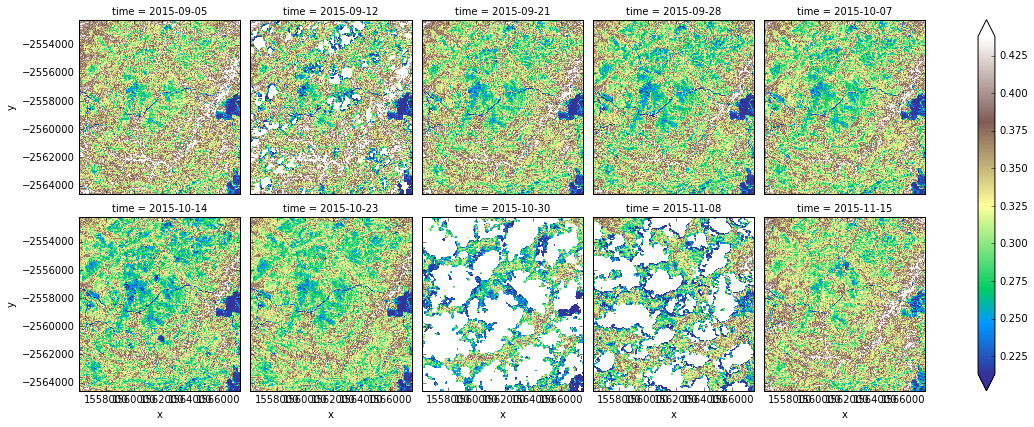

In [33]:
ndvi[-10:].plot(col='time', col_wrap=5, robust=True, cmap='terrain')

In [20]:
MASK_FLAGS = {
    'contiguous': True,
    'cloud_acca': 'no_cloud',
    'cloud_fmask': 'no_cloud',
    'cloud_shadow_acca': 'no_cloud_shadow',
    'cloud_shadow_fmask': 'no_cloud_shadow',
    'blue_saturated': False,
    'green_saturated': False,
    'red_saturated': False,
    'nir_saturated': False,
    'swir1_saturated': False,
    'swir2_saturated': False
}

In [21]:
pq = dc.load(product='ls8_pq_albers', like=data, fuse_func=ga_pq_fuser, group_by='solar_day')
mask = make_mask(pq, **MASK_FLAGS)

In [22]:
mask

<xarray.Dataset>
Dimensions:       (time: 37, x: 458, y: 494)
Coordinates:
  * y             (y) float64 -2.552e+06 -2.552e+06 -2.552e+06 -2.552e+06 ...
  * x             (x) float64 1.556e+06 1.556e+06 1.556e+06 1.556e+06 ...
  * time          (time) datetime64[ns] 2015-01-08 2015-01-15 2015-01-24 ...
Data variables:
    pixelquality  (time, y, x) bool False False False False True True True ...
Attributes:
    crs: EPSG:3577

In [24]:
cloudfreeRatio=0.5
pqmask =mask.pixelquality  
mostly_cloud_free = pqmask.sum(dim=('x', 'y')) > (cloudfreeRatio * pqmask.size / pqmask.time.size)

In [26]:
# Apply the time-dim mask to the 3D-array (time, x, y)
mostly_good_ndvi = ndvi.where(mostly_cloud_free).dropna('time', how='all')
# mostly_good_ndvi.plot(col='time', col_wrap=5)

print(mostly_good_ndvi)

<xarray.DataArray (time: 28, y: 494, x: 458)>
array([[[ 0.50803043,  0.53236797,  0.53833866, ...,  0.52886836,
          0.51382824,  0.48902056],
        [ 0.50395998,  0.51715585,  0.53587174, ...,  0.60067539,
          0.60647773,  0.60425184],
        [ 0.50305002,  0.52064777,  0.54702495, ...,  0.62790698,
          0.65159782,  0.64166002],
        ..., 
        [ 0.61613352,  0.61511492,  0.56103679, ...,  0.6120987 ,
          0.5581457 ,  0.44839949],
        [ 0.62750283,  0.63895487,  0.59922027, ...,  0.61043108,
          0.55346588,  0.5054659 ],
        [ 0.63076923,  0.63759458,  0.62233046, ...,  0.58936562,
          0.55050095,  0.53784219]],

       [[ 0.51648352,  0.54743174,  0.55431034, ...,  0.62229697,
          0.61989676,  0.59345563],
        [ 0.52285192,  0.52946551,  0.54686156, ...,  0.63593823,
          0.64368348,  0.64201602],
        [ 0.53742716,  0.54492624,  0.57473163, ...,  0.66958808,
          0.67687528,  0.65452092],
        ..., 
      

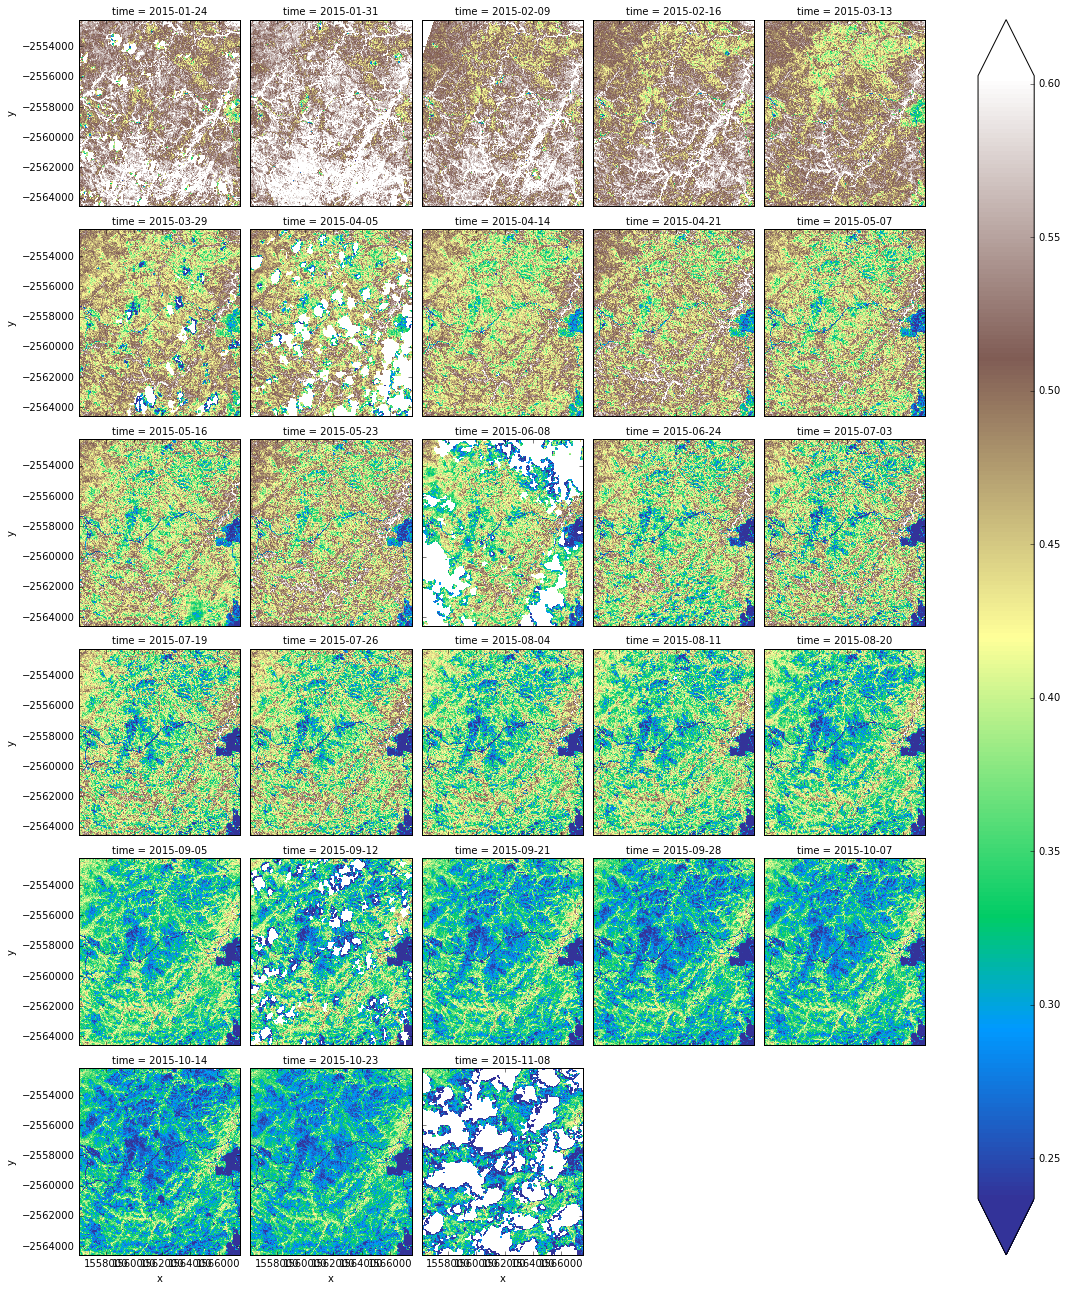

In [28]:
mostly_good_ndvi.plot(col='time', col_wrap=5,robust=True, cmap='terrain')